In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score 

In [3]:
data = pd.read_csv("marketing/marketing_customer_analysis.csv")

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.shape

(9134, 24)

In [6]:
y = data["Total Claim Amount"]

In [7]:
X = data.drop(["Total Claim Amount"],axis=1)

In [12]:
lm = linear_model.LinearRegression()

In [14]:
X_num = data.select_dtypes(include = np.number)
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
X_cat = data.select_dtypes(include=object)
X_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


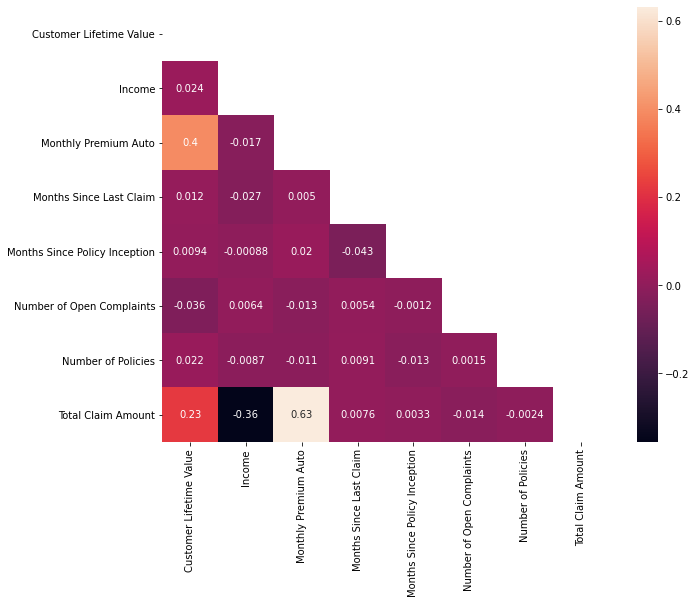

In [16]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(correlations_matrix, mask = mask, annot = True)
plt.show()

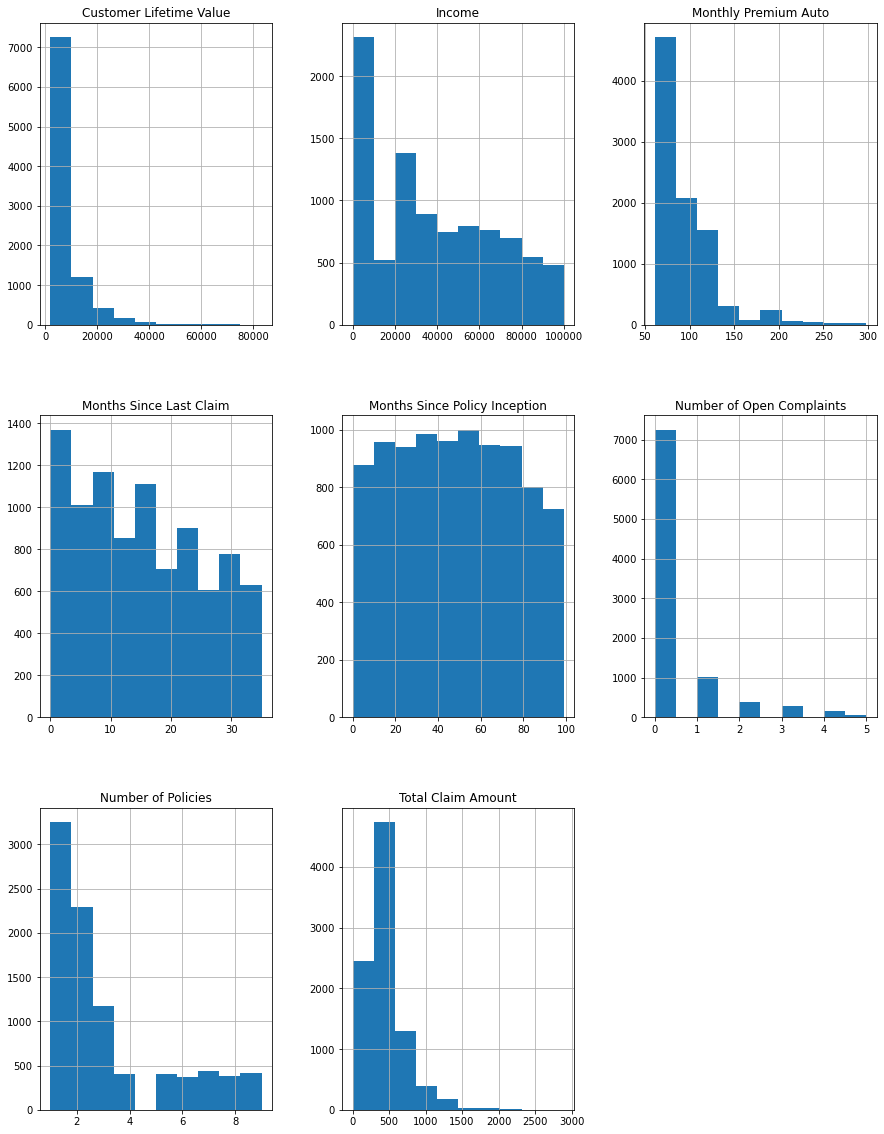

In [17]:
X_num.hist(figsize = (15,20));

<AxesSubplot:xlabel='Customer Lifetime Value'>

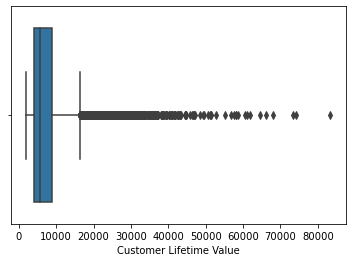

In [18]:
sns.boxplot(x=X_num["Customer Lifetime Value"])

In [19]:
iqr = np.percentile(X_num["Customer Lifetime Value"],75)-np.percentile(X_num["Customer Lifetime Value"],25)
upper_limit=np.percentile(X_num["Customer Lifetime Value"],75)+(1.5*iqr)
lower_limit=np.percentile(X_num["Customer Lifetime Value"],25)-(1.5*iqr)
excl_outliers=X_num[(X_num["Customer Lifetime Value"]>lower_limit)&(X_num["Customer Lifetime Value"]<upper_limit)]


<AxesSubplot:xlabel='Customer Lifetime Value'>

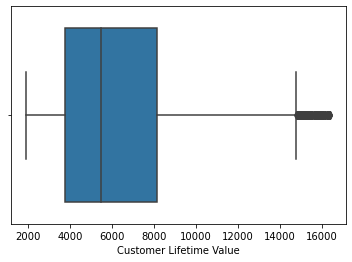

In [20]:
sns.boxplot(x=excl_outliers["Customer Lifetime Value"])

In [47]:
excl_outliers.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


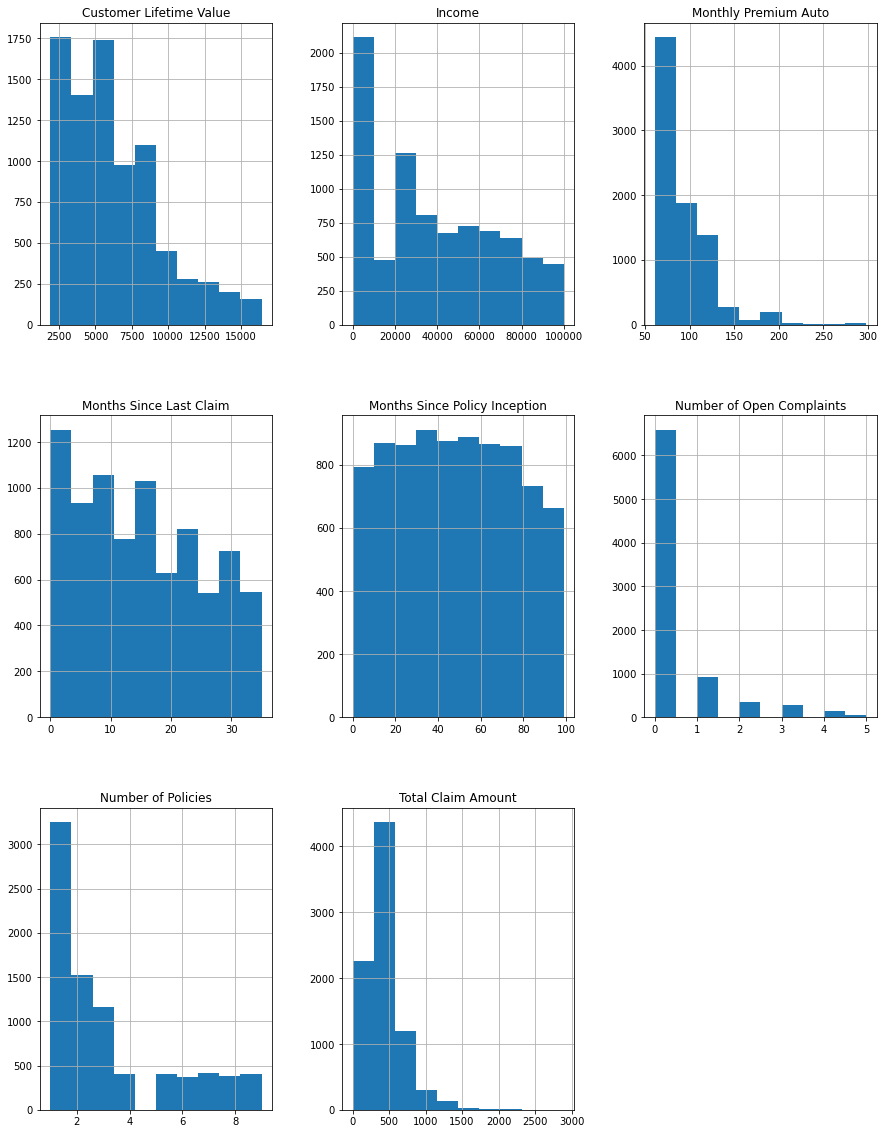

In [50]:
excl_outliers.hist(figsize=(15,20));

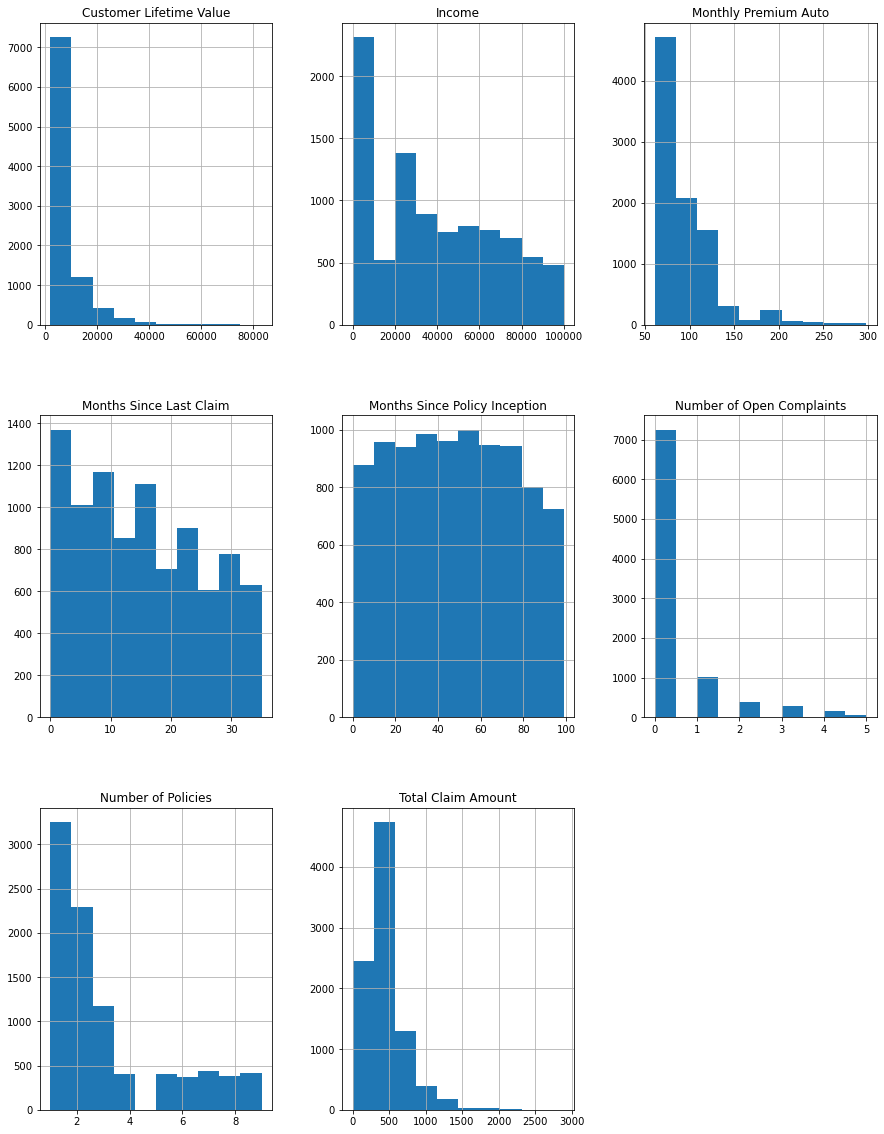

In [21]:
X_num.hist(figsize = (15,20));

In [24]:
from sklearn.preprocessing import MinMaxScaler

transform = MinMaxScaler().fit(X_num)
X_numscaled = transform.transform(X_num)

In [25]:
scaled = pd.DataFrame(X_numscaled)

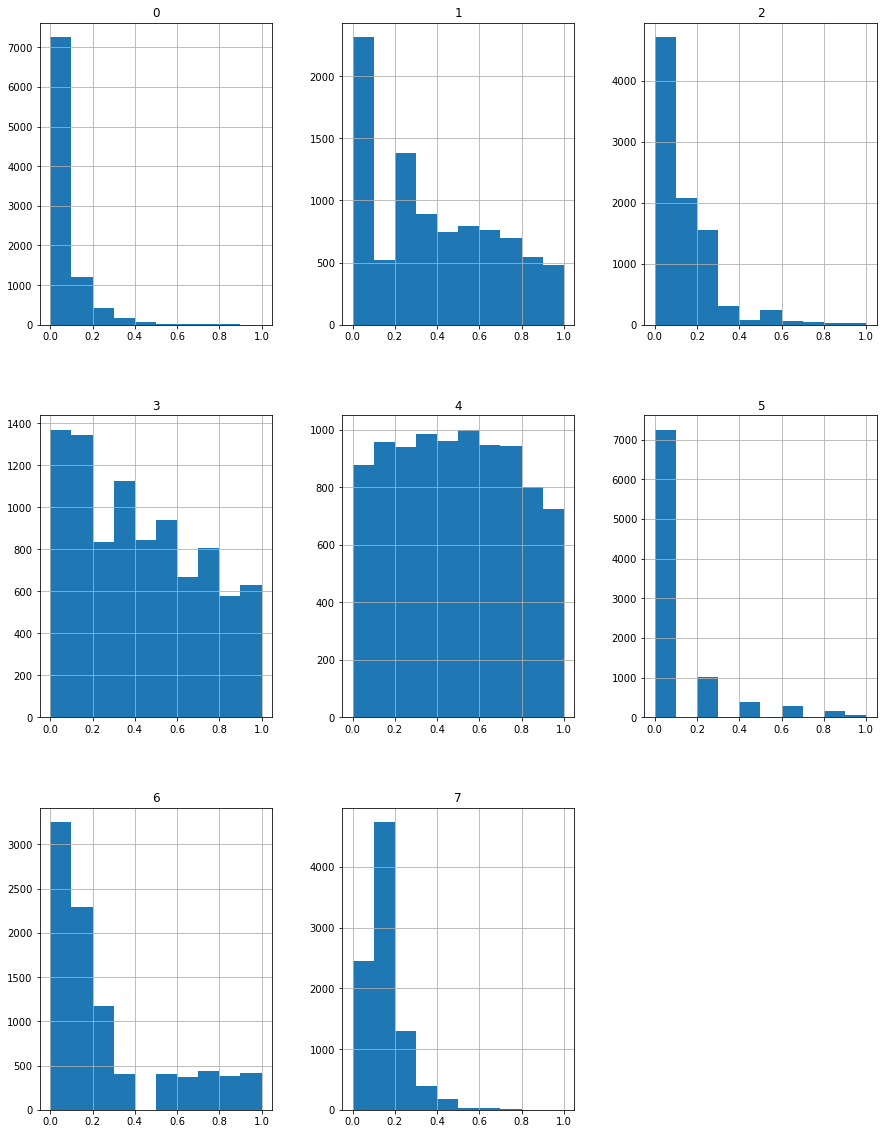

In [26]:
scaled.hist(figsize = (15,20));

In [27]:
X_num = X_numscaled

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [29]:
X_cat = encoded

In [31]:
X_cat.shape

(9134, 9234)

In [32]:
X_num.shape

(9134, 8)

In [33]:
X = np.concatenate((X_num,X_cat),axis=1)

In [34]:
X.shape

(9134, 9242)

In [35]:
y.shape

(9134,)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [42]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)  
predictions = lm.predict(X_test) 
r2_score(y_test, predictions)

0.9984932435725978

In [39]:
mse = mean_squared_error(y_test, predictions)

In [40]:
mse

122.24723046757563

In [41]:
rsme = np.sqrt(mse)
rsme

11.056546950453185